In [1]:
from os import path, listdir
from PIL import Image
import numpy as np

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
def get_data(directory: str) -> "tuple[np.ndarray, np.ndarray]":
    ima = listdir(path.join(directory, "PNEUMONIA"))
    nema = listdir(path.join(directory, "NORMAL"))
    size = len(ima) + len(nema)
    X = np.empty((size, 250, 350), dtype=np.uint8)
    y = np.empty((size), dtype=np.uint8)
    for i, file in enumerate(ima):
        X[i] = np.asarray(Image.open(path.join(directory, "PNEUMONIA", file)))
        y[i] = 1
    for i, file in enumerate(nema):
        X[len(ima) + i] = np.asarray(Image.open(path.join(directory, "NORMAL", file)))
        y[len(ima) + i] = 0
    return X , y

In [5]:
from modeli_stefan import make_model_3

In [17]:
directory_train = "../chest_xray_norm/train"
x_train, y_train = get_data(directory_train)

directory_val = "../chest_xray_norm/val"
x_val, y_val = get_data(directory_val)

model = make_model_3(x_train[0].shape)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 250, 350)]        0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 250, 350)          0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 250, 350)          0         
_________________________________________________________________
tf.clip_by_value_1 (TFOpLamb (None, 250, 350)          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 250, 350, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 248, 348, 8)       80        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 245, 345, 12)      1548

In [18]:
checkpoint_path = "checkpoints_mreza_3.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [19]:
history = model.fit(x_train, y_train, epochs=100, batch_size=0, verbose=1,
                    shuffle=True, validation_data=(x_val,y_val),callbacks=[cp_callback])

Epoch 1/100
163/163 [==============================] - 24s 145ms/step - loss: 0.4023 - accuracy: 0.8258 - precision_1: 0.8381 - recall_1: 0.9567 - val_loss: 0.6653 - val_accuracy: 0.5625 - val_precision_1: 0.5333 - val_recall_1: 1.0000

Epoch 00001: saving model to checkpoints_mreza_3.ckpt
Epoch 2/100
163/163 [==============================] - 23s 142ms/step - loss: 0.1362 - accuracy: 0.9518 - precision_1: 0.9708 - recall_1: 0.9647 - val_loss: 0.2064 - val_accuracy: 0.9375 - val_precision_1: 0.8889 - val_recall_1: 1.0000

Epoch 00002: saving model to checkpoints_mreza_3.ckpt
Epoch 3/100
163/163 [==============================] - 23s 143ms/step - loss: 0.0831 - accuracy: 0.9673 - precision_1: 0.9803 - recall_1: 0.9758 - val_loss: 0.7485 - val_accuracy: 0.6875 - val_precision_1: 0.6154 - val_recall_1: 1.0000

Epoch 00003: saving model to checkpoints_mreza_3.ckpt
Epoch 4/100
163/163 [==============================] - 24s 145ms/step - loss: 0.0712 - accuracy: 0.9721 - precision_1: 0.9818 -

163/163 [==============================] - 23s 143ms/step - loss: 1.8372e-05 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 1.7054 - val_accuracy: 0.8750 - val_precision_1: 0.8000 - val_recall_1: 1.0000

Epoch 00029: saving model to checkpoints_mreza_3.ckpt
Epoch 30/100
163/163 [==============================] - 23s 144ms/step - loss: 1.5020e-05 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 1.7538 - val_accuracy: 0.8750 - val_precision_1: 0.8000 - val_recall_1: 1.0000

Epoch 00030: saving model to checkpoints_mreza_3.ckpt
Epoch 31/100
163/163 [==============================] - 22s 137ms/step - loss: 9.0251e-06 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 1.7159 - val_accuracy: 0.8750 - val_precision_1: 0.8000 - val_recall_1: 1.0000

Epoch 00031: saving model to checkpoints_mreza_3.ckpt
Epoch 32/100
163/163 [==============================] - 23s 139ms/step - loss: 9.1623e-06 - accuracy: 1.0000 - precision_1: 1


Epoch 00056: saving model to checkpoints_mreza_3.ckpt
Epoch 57/100
163/163 [==============================] - 25s 151ms/step - loss: 7.3535e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 2.1809 - val_accuracy: 0.8750 - val_precision_1: 0.8000 - val_recall_1: 1.0000

Epoch 00057: saving model to checkpoints_mreza_3.ckpt
Epoch 58/100
163/163 [==============================] - 23s 141ms/step - loss: 9.0793e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 2.2264 - val_accuracy: 0.8750 - val_precision_1: 0.8000 - val_recall_1: 1.0000

Epoch 00058: saving model to checkpoints_mreza_3.ckpt
Epoch 59/100
163/163 [==============================] - 23s 142ms/step - loss: 5.8455e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 2.1622 - val_accuracy: 0.8750 - val_precision_1: 0.8000 - val_recall_1: 1.0000

Epoch 00059: saving model to checkpoints_mreza_3.ckpt
Epoch 60/100
163/163 [==============================] - 2


Epoch 00084: saving model to checkpoints_mreza_3.ckpt
Epoch 85/100
163/163 [==============================] - 23s 138ms/step - loss: 1.7717e-07 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 2.5642 - val_accuracy: 0.8750 - val_precision_1: 0.8000 - val_recall_1: 1.0000

Epoch 00085: saving model to checkpoints_mreza_3.ckpt
Epoch 86/100
163/163 [==============================] - 23s 139ms/step - loss: 6.3081e-08 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 2.5458 - val_accuracy: 0.8750 - val_precision_1: 0.8000 - val_recall_1: 1.0000

Epoch 00086: saving model to checkpoints_mreza_3.ckpt
Epoch 87/100
163/163 [==============================] - 23s 139ms/step - loss: 5.2348e-08 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 2.6143 - val_accuracy: 0.8750 - val_precision_1: 0.8000 - val_recall_1: 1.0000

Epoch 00087: saving model to checkpoints_mreza_3.ckpt
Epoch 88/100
163/163 [==============================] - 2

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

In [21]:
import matplotlib.pyplot as plt

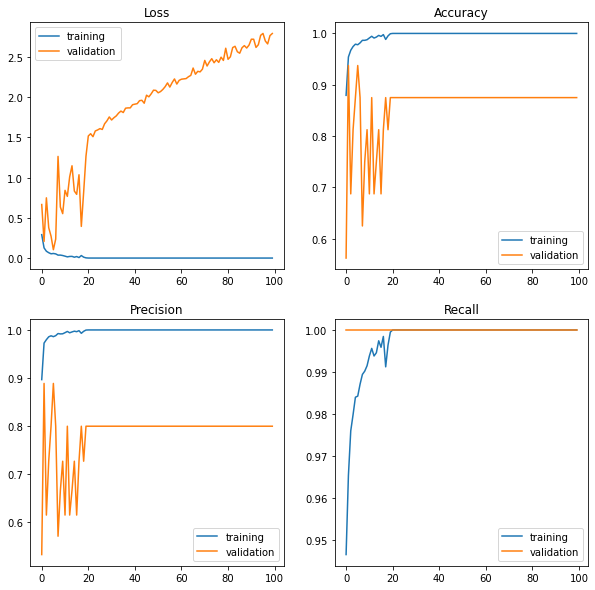

In [23]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(2, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.subplot(2, 2, 3)
plt.title('Precision')
plt.plot(history.epoch, history.history['precision_1'], label='training')
plt.plot(history.epoch, history.history['val_precision_1'], label='validation')
plt.legend(loc='best')

plt.subplot(2, 2, 4)
plt.title('Recall')
plt.plot(history.epoch, history.history['recall_1'], label='training')
plt.plot(history.epoch, history.history['val_recall_1'], label='validation')
plt.legend(loc='best')

plt.show()

In [24]:
model.save("./modeli/stefan/model_3_epoha_100.h5")

In [25]:
import json
  
# Serializing json 
json_history = json.dumps(history.history, indent = 4)
  
# Writing json
with open("./modeli/stefan/model_3_epoha_100.json", "w") as outfile:
    outfile.write(json_history)

In [26]:
# loadovanje modela
from tensorflow.keras.models import load_model

model2 = load_model('./modeli/stefan/model_3_epoha_100.h5')

In [27]:
#loadovanje istorije

with open('./modeli/stefan/model_3_epoha_100.json', 'r') as openfile:
    # Reading from json file
    history2 = json.load(openfile)


In [28]:
len(history2['loss'])

100

In [ ]:
#history.history.keys()

In [ ]:
#len(history.history['loss'])

In [29]:
directory_test = "../chest_xray_norm/test"
x_test, y_test = get_data(directory_test)

In [30]:
y_pred = model2.predict(x_test)

In [31]:
#y_pred_round = np.round(y_pred)

In [32]:
y_pred = y_pred.astype(int)

In [33]:
#y_test

In [34]:
#y_pred

In [35]:
y_pred = np.ravel(y_pred)

In [36]:
tacnost = [y_pred==y_test]

In [37]:
#tacnost

In [38]:
tacnost = np.average(tacnost)

In [39]:
tacnost

0.8189102564102564

In [41]:
cp_callback.model()

TypeError: 'ModelCheckpoint' object is not subscriptable

In [49]:
cekovi = tf.train.load_checkpoint("./")

In [50]:
cekovi

In [52]:
cekovi.CheckpointReader_GetTensor(1)

TypeError: CheckpointReader_GetTensor(): incompatible function arguments. The following argument types are supported:
    1. (arg0: tensorflow.python._pywrap_checkpoint_reader.CheckpointReader, arg1: str) -> object

Invoked with: 1

In [46]:
model_cek = make_model_3(x_train[0].shape)

In [48]:
model.load(cekovi)

AttributeError: 'Functional' object has no attribute 'load'